In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modellingcsv/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/churn-modellingcsv/Churn_Modelling.csv')

In [3]:
df.head()

# print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**How many customer left bank ?? (Exited)**

In [5]:
df[df['Exited'] == 0].shape

(7963, 14)

In [6]:
#df['Geography'].value_counts()

df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

**For any predictions we dont need any ID, surname, row_number**

In [7]:
df.drop(columns = ['RowNumber' , 'CustomerId' , 'Surname'], inplace = True)

print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


**ONE HOT ENCODING OF GENDER AND PLACE**

In [8]:
# pd.get_dummies(df , columns = ['Gender','Geography'])

df_dummies = pd.get_dummies(df , columns = ['Gender', 'Geography'] , drop_first=True)
 
df_dummies = df_dummies.astype(int) 

When we observe Balance then some are single digit and some are 6 digit. Not a good thing

In [9]:
X = df_dummies.drop(columns = ['Exited'])
y = df_dummies['Exited']   # predicting whether user is still there or exited from bank

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,1,0,0
9996,516,35,10,57369,1,1,1,101699,1,0,0
9997,709,36,7,0,1,0,1,42085,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [12]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test) # Uses the already fitted scaler (with X_train's mean and std) to transform X_test.

In [13]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  0.91509065,
         1.71490137, -0.57273139],
       [-0.25150912, -0.94449979, -0.35520275, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -1.09278791,
         1.71490137, -0.57273139],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.91509065,
         1.71490137, -0.57273139]])

In [14]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-07-30 18:38:06.956266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753900687.201311      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753900687.269784      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
model = Sequential()

model.add(Dense(3, activation='sigmoid', input_dim = 11))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-30 18:38:23.119923: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [18]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0962 - val_loss: 0.8891
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8403 - val_loss: 0.7071
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6754 - val_loss: 0.5982
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5766 - val_loss: 0.5353
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5242 - val_loss: 0.5006
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4914 - val_loss: 0.4806
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4731 - val_loss: 0.4688
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4598 - val_loss: 0.4607
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4619 - val_loss: 0.4549
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4472 - val_loss: 0.4504


In [19]:
model.layers[0].get_weights()

[array([[ 0.13348924, -0.32961392,  0.30562738],
        [-1.0649469 ,  0.819824  ,  0.34435266],
        [ 0.10637794, -0.00487785,  0.12483908],
        [-0.56607205, -0.2122277 ,  0.08030321],
        [-0.0898646 , -0.91244745,  0.05456268],
        [ 0.14048749,  0.18512225, -0.3669656 ],
        [ 0.7542036 , -0.27314523, -0.14313316],
        [-0.13636036,  0.06913141, -0.12407462],
        [ 0.5144792 , -0.1237954 , -0.23330188],
        [-0.3377703 ,  0.45408162,  0.7242948 ],
        [-0.04102451,  0.2288639 , -0.46015474]], dtype=float32),
 array([ 1.1057651 , -0.694491  , -0.59694225], dtype=float32)]

In [20]:
model.layers[1].get_weights()

[array([[-1.2654144 ],
        [ 0.6070235 ],
        [ 0.33235583]], dtype=float32),
 array([-0.8413716], dtype=float32)]

In [21]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
y_pred = np.where(y_log > 0.5 , 1 , 0) 

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

# to improve we can increase epochs or activation functions as ReLu or increase hidden layer nodes or increase hidden layer


0.7935

In [24]:
import matplotlib.pyplot as plt

history.history

{'loss': [1.0271886587142944,
  0.7929554581642151,
  0.6475284695625305,
  0.5626413822174072,
  0.5146017670631409,
  0.4875144064426422,
  0.47155001759529114,
  0.4612495005130768,
  0.45391079783439636,
  0.4482748508453369],
 'val_loss': [0.8890901803970337,
  0.707136332988739,
  0.5981606245040894,
  0.5353188514709473,
  0.5005546808242798,
  0.48060891032218933,
  0.4687606692314148,
  0.46072959899902344,
  0.4549104571342468,
  0.450398325920105]}

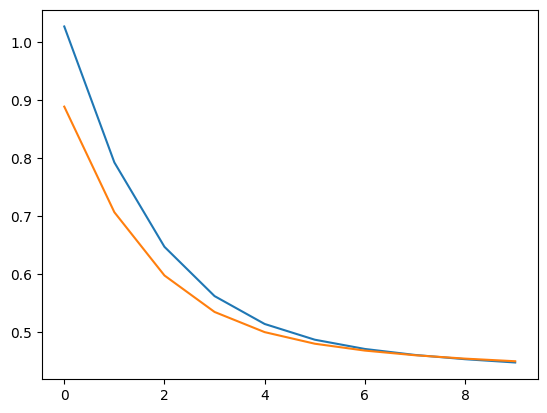

In [25]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])